Проектная работа
Рынок заведений общественного питания Москвы

Описание проекта
Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

Вам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. 

подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

**Описание данных**


    Файл moscow_places.csv:
    name — название заведения;
    address — адрес заведения;
    category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
    hours — информация о днях и часах работы;
    lat — широта географической точки, в которой находится заведение;
    lng — долгота географической точки, в которой находится заведение;
    rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
    price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
    avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
        «Средний счёт: 1000–1500 ₽»;
        «Цена чашки капучино: 130–220 ₽»;
        «Цена бокала пива: 400–600 ₽».
        и так далее;
    middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
        Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
    middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
        Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
    chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
        0 — заведение не является сетевым
        1 — заведение является сетевым
    district — административный район, в котором находится заведение, например Центральный административный округ;
    seats — количество посадочных мест.

Шаг 1. Загрузите данные и изучите общую информацию
Загрузите данные о заведениях общественного питания Москвы.
Путь к файлу: /datasets/moscow_places.csv. Скачать датасет.
Изучите общую информацию о датасете. Сколько заведений представлено? Что можно сказать о каждом столбце? Значения какого типа они хранят? 

In [194]:
# импортируем библиотеки
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns


In [195]:
# загружаем данные о заведениях общественного питания Москвы из CSV-файла в переменную 
try:
    df = pd.read_csv('moscow_places.csv')
except:
    df = pd.read_csv('/datasets/moscow_places.csv')

In [196]:
df.tail()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,NaN,NaN,NaN,NaN,0,86.0
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,NaN,NaN,NaN,NaN,0,150.0
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,NaN,Средний счёт:от 150 ₽,150.0,NaN,0,150.0
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,NaN,NaN,NaN,NaN,1,150.0
8405,Kebab Time,кафе,"Москва, Россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",55.598229,37.604702,3.9,NaN,NaN,NaN,NaN,0,12.0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Перед нами данные о заведениях общественного питания Москвы с указанием наименования, категории и адреса 8406 заведений.

Шаг 2. Выполните предобработку данных
Изучите, есть ли дубликаты в данных. Поищите пропуски: встречаются ли они, в каких столбцах? Можно ли их обработать или оставить как есть?
Выполните предобработку данных:
Создайте столбец street с названиями улиц из столбца с адресом.
Создайте столбец is_24_7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
логическое значение True — если заведение работает ежедневно и круглосуточно;
логическое значение False — в противоположном случае.

In [198]:
# проверим наличие явных дубликатов
print('Количество дубликатов в таблице:', df.duplicated().sum())

Количество дубликатов в таблице: 0


In [199]:
# проверим наличие пропущенных значений
df.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

Обнаружены пропущенные значения:

    в столбце hours по 536 строкам пропущена информация о днях и часах работы,
    в столбце price по 5091 строке отсутствует категория цен в заведении,  
    в столбце avg_bill в 4590 строках отсутствует средняя стоимость заказа,
    в столбцах middle_avg_bill и middle_coffee_cup пропущены данные с оценкой среднего чека, оценкой одной чашки капучино - 5257 и 7871 строкам соответственно,
    также пропущено количество посадочных мест по 3611 заведению.
    
Так как заполнение пропущенных значений в датафрейме не представляется возможным, либо потребует большое количество времени, оставим пропуски.    

заменим число, выраженное 0 или 1 в столбце chain, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки) на значения "заведение не является сетевым" и "заведение является сетевым" соответственно

In [200]:
df.loc[df["chain"] == 0, "chain"] = 'заведение не является сетевым'
df.loc[df["chain"] == 1, "chain"] = 'заведение является сетевым'

In [201]:
# Создадим столбец street с названиями улиц из столбца с адресом.

df['street']=[x.split(',')[1] for x in df['address'].values]

In [202]:
# Создадим столбец is_24_7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7)
df['is_24_7']=np.where(df['hours']=='ежедневно, круглосуточно', True, False)


In [203]:
df.tail()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,NaN,NaN,NaN,NaN,заведение не является сетевым,86.0,Профсоюзная улица,False
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,NaN,NaN,NaN,NaN,заведение не является сетевым,150.0,Пролетарский проспект,False
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,NaN,Средний счёт:от 150 ₽,150.0,NaN,заведение не является сетевым,150.0,Люблинская улица,True
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,NaN,NaN,NaN,NaN,заведение является сетевым,150.0,Люблинская улица,True
8405,Kebab Time,кафе,"Москва, Россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",55.598229,37.604702,3.9,NaN,NaN,NaN,NaN,заведение не является сетевым,12.0,Россошанский проезд,True


In [204]:
# проверим датафрейм на наличие неявных дубликатов
df.loc[df.duplicated(subset=['name', 'category', 'address'], keep=False)].sort_values('name')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7


В ходе предобработки данных были выявлены пропущенные значения в столбцах: hours, price, avg_bill, middle_avg_bill и middle_coffee_cup, а также в столбце seats. Дубликатов нет. Были добавлены два столбца: столбец street с названиями улиц из столбца с адресом и столбец is_24_7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
логическое значение True — если заведение работает ежедневно и круглосуточно;
логическое значение False — в противоположном случае.
Итак, данные готовы к анализу.


Шаг 3. Анализ данных

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?
Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.
Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?
Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson (скачать файл для локальной работы).
Отобразите все заведения датасета на карте с помощью кластеров средствами библиотеки folium.
Найдите топ-15 улиц по количеству заведений. Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.
Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?
Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. Постройте фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?
Необязательное задание: проиллюстрируйте другие взаимосвязи, которые вы нашли в данных. Например, по желанию исследуйте часы работы заведений и их зависимость от расположения и категории заведения. Также можно исследовать особенности заведений с плохими рейтингами, средние чеки в таких местах и распределение по категориям заведений.
Соберите наблюдения по вопросам выше в один общий вывод.

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Ответьте на вопрос о распределении заведений по категориям.

In [205]:
data_category=df['category'].value_counts().reset_index()
data_category.columns=['category', 'count']

In [206]:
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0','#0D98BA','#006400','#008B8B']

In [207]:
fig = px.bar(data_category, x='category', y='count', color='category',title='Количество объектов общественного питания по категориям')
fig.update_xaxes(tickangle=45)
fig.show() 

Исследуйте количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Проанализируйте результаты и сделайте выводы.


In [208]:
data_seats = df.groupby('category')['seats'].median()
data_seats

category
бар,паб            82.5
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           75.5
Name: seats, dtype: float64

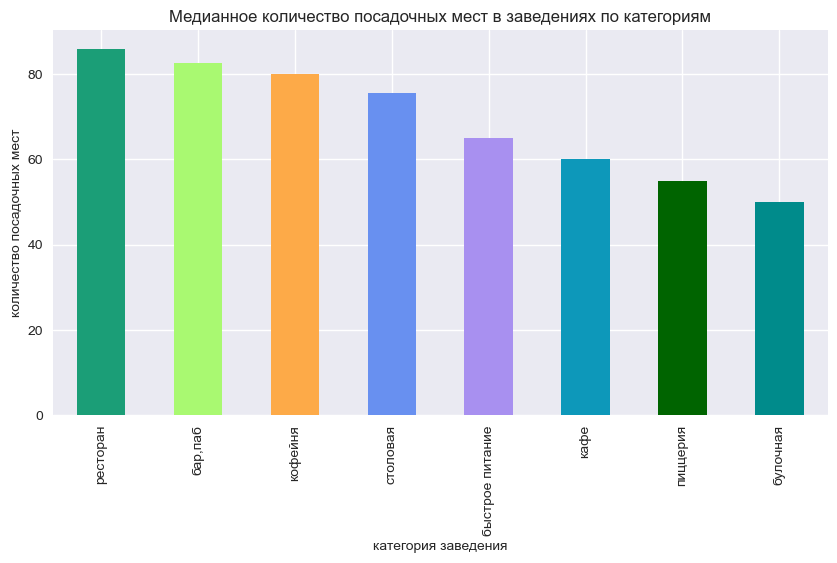

In [209]:
plt.figure(figsize=(10, 5))
data_seats.sort_values(ascending=False).plot.bar(color=colors)
plt.title('Медианное количество посадочных мест в заведениях по категориям')
plt.xlabel('категория заведения')
plt.ylabel('количество посадочных мест')
plt.show()

Посмотрим, как распределено количество посадочных мест по категориям

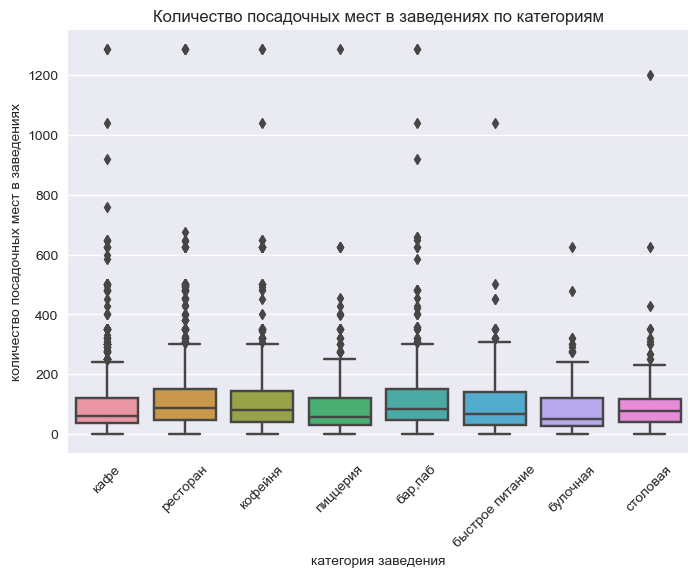

In [210]:

sns.boxplot(x="category", y="seats", data=df)

plt.title('Количество посадочных мест в заведениях по категориям')
plt.xlabel('категория заведения')
plt.ylabel('количество посадочных мест в заведениях')
plt.xticks(rotation=45)
plt.show()


На графике наблюдаем аномально большое количество посадочных мест по всем категориям заведений.

Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?


In [211]:
# готовим данные для графика
df_chain = pd.DataFrame(df['chain'].value_counts()).reset_index()
# строим диаграмму с сегментами
fig = go.Figure(data=[go.Pie(labels=df_chain['index'], # указываем значения, которые появятся на метках сегментов
                             values=df_chain['chain'])]) # указываем данные, которые отобразятся на графике
                             
fig.update_layout(title='Соотношение сетевых и несетевых заведений', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='отношение заведения к сети',
                                    showarrow=False)])
fig.show() # выводим график

Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.


In [217]:
# сделаем срез данных, оставим заведения, которые являются сетевыми
data_chain = df.loc[df['chain'] == 'заведение является сетевым']
#data_chain.reset_index()
data_chain

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,заведение является сетевым,148.0,Правобережная улица,False
13,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",55.877007,37.504980,4.8,NaN,NaN,NaN,NaN,заведение является сетевым,180.0,Базовская улица,False
19,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",55.887969,37.515688,4.4,NaN,NaN,NaN,NaN,заведение является сетевым,NaN,Ижорский проезд,True
20,Чебуреки Манты,кафе,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.880287,37.448646,4.3,NaN,NaN,NaN,NaN,заведение является сетевым,148.0,Правобережная улица,False
23,Буханка,булочная,"Москва, Лобненская улица, 13к2",Северный административный округ,"ежедневно, 08:00–22:00",55.888421,37.527106,4.7,NaN,NaN,NaN,NaN,заведение является сетевым,NaN,Лобненская улица,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8317,Беседка,кафе,"Москва, Кузьминская улица, 10",Юго-Восточный административный округ,"ежедневно, 11:00–23:00",55.690691,37.787735,4.1,NaN,NaN,NaN,NaN,заведение является сетевым,NaN,Кузьминская улица,False
8340,Семейный Очаг,ресторан,"Москва, Шоссейная улица, 13",Юго-Восточный административный округ,"ежедневно, 12:00–00:00",55.688104,37.725197,4.3,средние,Средний счёт:до 1000 ₽,1000.0,NaN,заведение является сетевым,98.0,Шоссейная улица,False
8372,Чайхана Sabr,ресторан,"Москва, улица Хлобыстова, 22",Юго-Восточный административный округ,"ежедневно, 10:00–00:00",55.716361,37.813436,3.9,средние,Средний счёт:150–350 ₽,250.0,NaN,заведение является сетевым,32.0,улица Хлобыстова,False
8379,Лагман Хаус,кафе,"Москва, Новороссийская улица, 14, стр. 2",Юго-Восточный административный округ,"ежедневно, 10:00–00:00",55.678772,37.759422,4.3,NaN,NaN,NaN,NaN,заведение является сетевым,40.0,Новороссийская улица,False


In [213]:
#сделаем срез данных, оставим заведения, которые являются сетевыми
data_chain = pd.DataFrame(df['category'].value_counts()).reset_index()

data_chain.columns=['category','count']

data_chain

,category,count
0,кафе,2378
1,ресторан,2043
2,кофейня,1413
3,"бар,паб",765
4,пиццерия,633
5,быстрое питание,603
6,столовая,315
7,булочная,256


In [214]:
# строим диаграмму с сегментами
fig = go.Figure(data=[go.Pie(labels=data_chain['category'], # указываем значения, которые появятся на метках сегментов
                             values=data_chain['count'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Число сетевых заведений по категориям', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Категория',
                                    showarrow=False)])
fig.show() # выводим график

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?

In [220]:
# воспользуемся таблицей data_chain, содержащую информацию о сетевых заведениях
data_chain.reset_index()
df_name=data_chain['name'].value_counts()
top_15=df_name.head(15)
top_15

Шоколадница                            120
Домино'с Пицца                          76
Додо Пицца                              74
One Price Coffee                        71
Яндекс Лавка                            69
Cofix                                   65
Prime                                   50
Хинкальная                              44
КОФЕПОРТ                                42
Кулинарная лавка братьев Караваевых     39
Теремок                                 38
Чайхана                                 37
Буханка                                 32
CofeFest                                32
Му-Му                                   27
Name: name, dtype: int64

Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.

In [222]:
df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [233]:

data_district = df.groupby(['district', 'category'])['name'].count()
data_district=data_district.reset_index()
data_district.columns=['district', 'category', 'count']
data_district

,district,category,count
0,Восточный административный округ,"бар,паб",53
1,Восточный административный округ,булочная,25
2,Восточный административный округ,быстрое питание,71
3,Восточный административный округ,кафе,272
4,Восточный административный округ,кофейня,105
...,...,...,...
67,Южный административный округ,кафе,264
68,Южный административный округ,кофейня,131
69,Южный административный округ,пиццерия,73
70,Южный административный округ,ресторан,202


In [232]:
fig = px.line(data, x='category', y='count', color='district', title='Результаты Coderre по районам')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['name'] but received: category